In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import fftpack as fp
from skimage import io, color, util

from helper import *

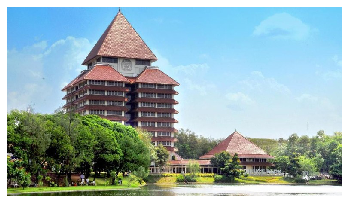

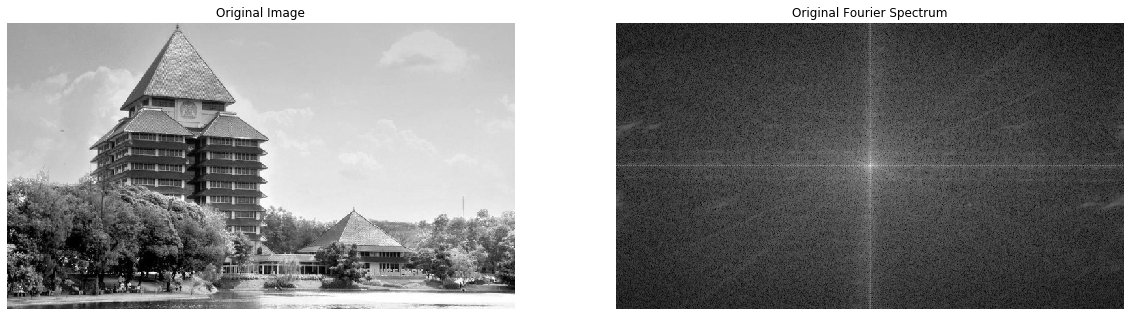

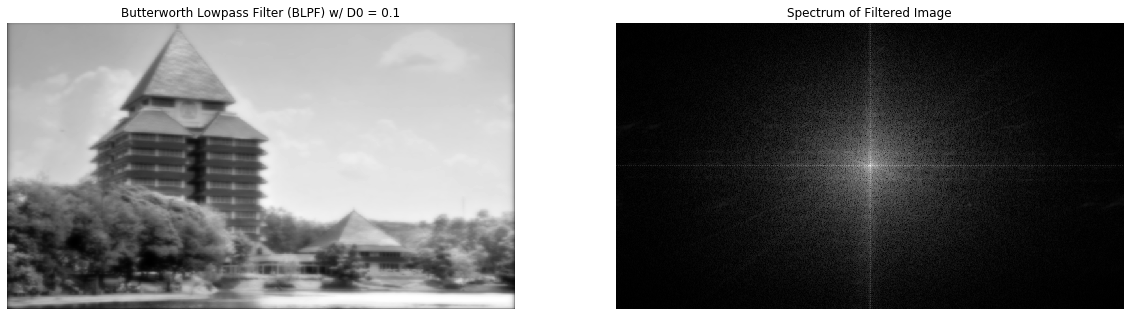

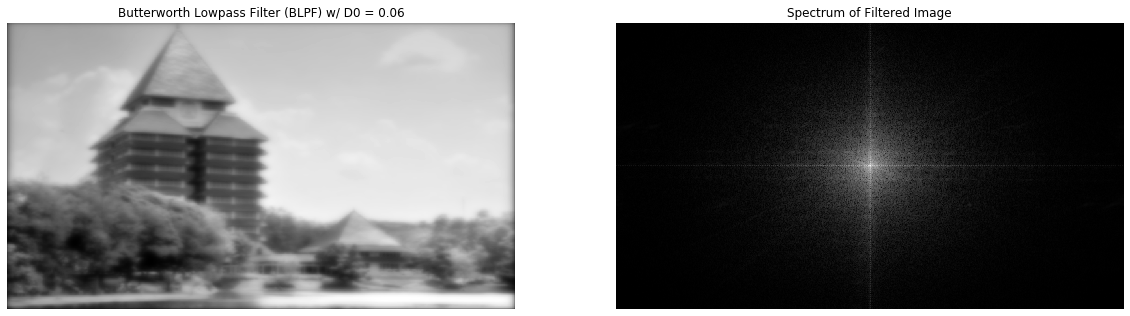

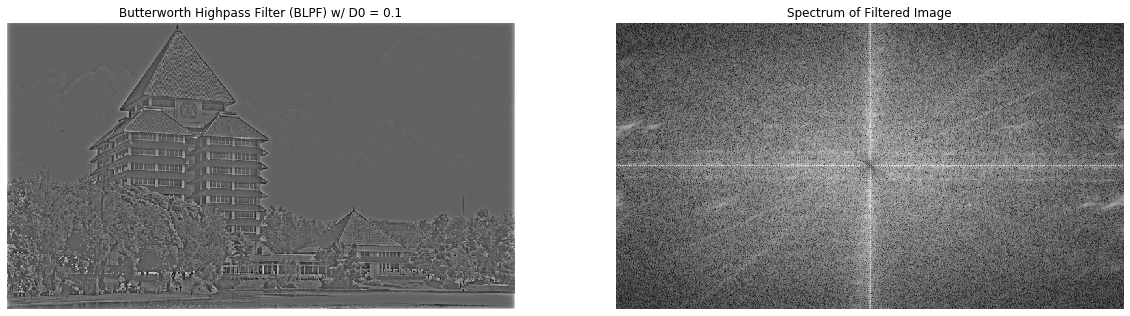

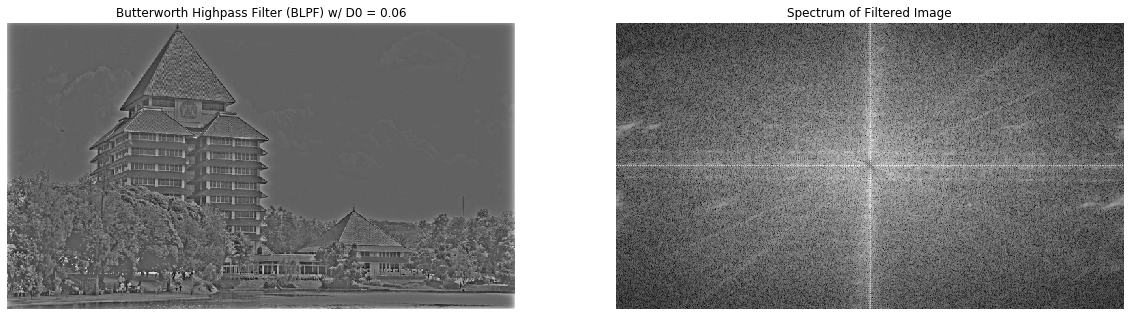

In [50]:
##### NOMOR 1
img1=io.imread('rektorat_ui.jpeg')
plt.imshow(img1);plt.axis("off");plt.show()
i1 = color.rgb2gray(img1)
w, l = paddedsize(i1.shape[0], i1.shape[1])
D0_1 = 0.1
D0_2 = 0.06
#
#
#
#
#Butterworth Lowpass Filter (BLPF) w/ D0 = 0.1
h1 = lpfilter('btw', w, l, D0_1 * w)

#Butterworth Lowpass Filter (BLPF) w/ D0 = .06
h2 = lpfilter('btw', w, l, D0_2 * w)

# menghitung DFT citra
f = fp.fft2(i1,(w,l))
# Apply lowpass filter
LPFS_rektorat1 = h1*f
LPFS_rektorat2 = h2*f

# convert ke domain spasial
LPF_rektorat1 = fp.ifft2(LPFS_rektorat1).real
LPF_rektorat1 = LPF_rektorat1[:i1.shape[0],:i1.shape[1]]

LPF_rektorat2 = fp.ifft2(LPFS_rektorat2).real
LPF_rektorat2 = LPF_rektorat2[:i1.shape[0],:i1.shape[1]]

# Menampilkan fourier spectrum
Fc = fp.fftshift(f)
Fcf1 = fp.fftshift(LPFS_rektorat1)
Fcf2 = fp.fftshift(LPFS_rektorat2)

# fungsi abs untuk menghitung magnitude
S1 = np.log(1+abs(Fc))
S2 = np.log(1+abs(Fcf1))
S3 = np.log(1+abs(Fcf2))

plt.figure(figsize=(20,8))
plt.subplot(121), plt.imshow(i1, cmap='gray'),plt.title('Original Image'),plt.axis("off")
plt.subplot(122), plt.imshow(S1, cmap='gray'),plt.title('Original Fourier Spectrum'),plt.axis("off")
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(121), plt.imshow(LPF_rektorat1, cmap='gray'),plt.title("Butterworth Lowpass Filter (BLPF) w/ D0 = 0.1"),plt.axis("off")
plt.subplot(122), plt.imshow(S2, cmap='gray'),plt.title("Spectrum of Filtered Image"),plt.axis("off")
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(121),plt.imshow(LPF_rektorat2, cmap='gray'), plt.title("Butterworth Lowpass Filter (BLPF) w/ D0 = 0.06"),plt.axis("off")
plt.subplot(122),plt.imshow(S3, cmap='gray'),plt.title("Spectrum of Filtered Image"),plt.axis("off")
plt.show()


#
#
#
#
#
#Butterworth Highpass Filter (BHPF) w/ D0 = 0.1
h3 = hpfilter('btw', w, l, D0_1 * w)

#Butterworth Highpass Filter (BHPF) w/ D0 = .06
h4 = hpfilter('btw', w, l, D0_2 * w)

# Apply highpass filter
HPFS_rektorat1 = h3*f
HPFS_rektorat2 = h4*f

# convert ke domain spasial
HPF_rektorat1 = fp.ifft2(HPFS_rektorat1).real
HPF_rektorat1 = HPF_rektorat1[:i1.shape[0],:i1.shape[1]]

HPF_rektorat2 = fp.ifft2(HPFS_rektorat2).real
HPF_rektorat2 = HPF_rektorat2[:i1.shape[0],:i1.shape[1]]

# Menampilkan fourier spectrum
Fcf3 = fp.fftshift(HPFS_rektorat1)
Fcf4 = fp.fftshift(HPFS_rektorat2)

# fungsi abs untuk menghitung magnitude
S4 = np.log(1+abs(Fcf3))
S5 = np.log(1+abs(Fcf4))

plt.figure(figsize=(20,8))
plt.subplot(121), plt.imshow(HPF_rektorat1, cmap='gray'),plt.title("Butterworth Highpass Filter (BLPF) w/ D0 = 0.1"),plt.axis("off")
plt.subplot(122), plt.imshow(S4, cmap='gray'),plt.title("Spectrum of Filtered Image"),plt.axis("off")
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(121), plt.imshow(HPF_rektorat2, cmap='gray'),plt.title("Butterworth Highpass Filter (BLPF) w/ D0 = 0.06"),plt.axis("off")
plt.subplot(122), plt.imshow(S5, cmap='gray'),plt.title("Spectrum of Filtered Image"),plt.axis("off")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


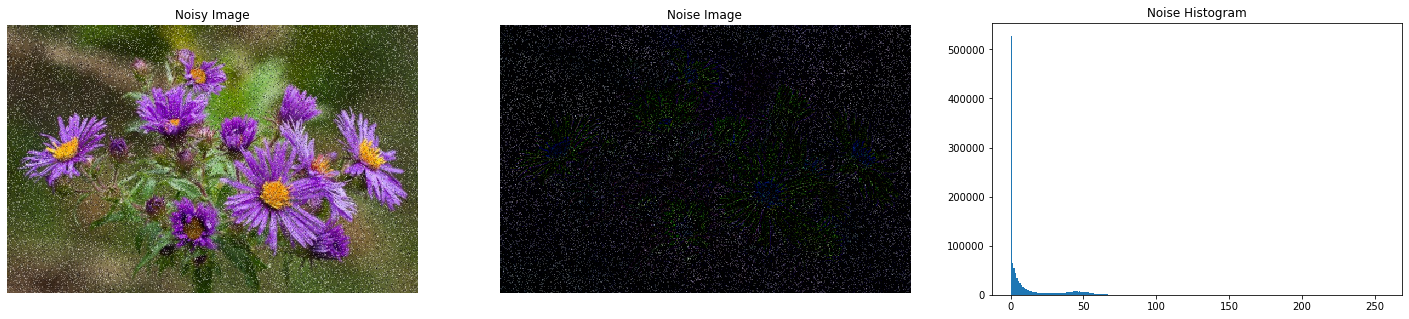

In [15]:
##### NOMOR 2
img2_noisy=io.imread('flowers_noisy.jpg')
img2=io.imread('flowers.jpg')
noise= np.subtract(img2_noisy, img2, dtype='int16')

noise_hist= util.img_as_ubyte(noise)

plt.figure(figsize=(25,5))
plt.subplot(131), plt.imshow(img2_noisy),plt.title('Noisy Image'),plt.axis("off")
plt.subplot(132), plt.imshow(noise),plt.title('Noise Image'),plt.axis("off")
plt.subplot(133), plt.hist(noise_hist.flatten(), 256, range=(0,256)),plt.title('Noise Histogram')
plt.show()

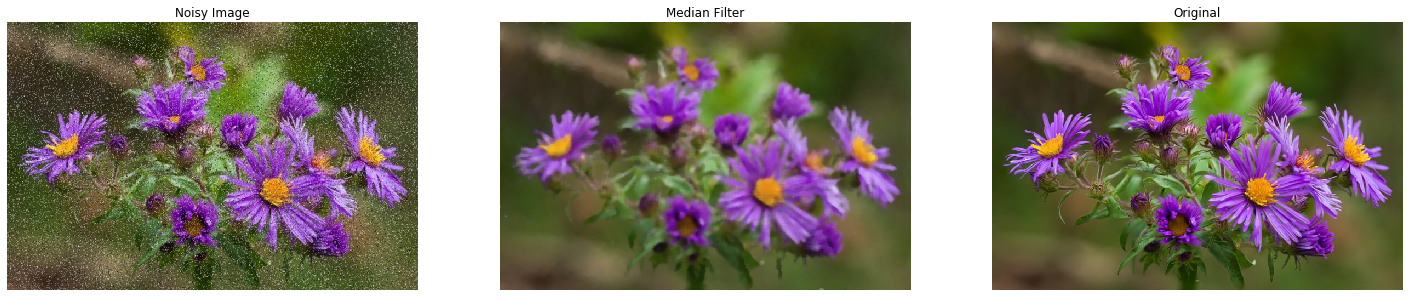

In [16]:
new_image = cv2.medianBlur(img2_noisy,9)

# from scipy import misc
# face = misc.face(gray=True).astype(float)
# blurred_f = ndimage.gaussian_filter(face, 3)

plt.figure(figsize=(25,5))
plt.subplot(131), plt.imshow(img2_noisy),plt.title('Noisy Image'),plt.axis("off")
plt.subplot(132), plt.imshow(new_image),plt.title('Median Filter'),plt.axis("off")
plt.subplot(133), plt.imshow(img2),plt.title('Original'),plt.axis("off")
plt.show()


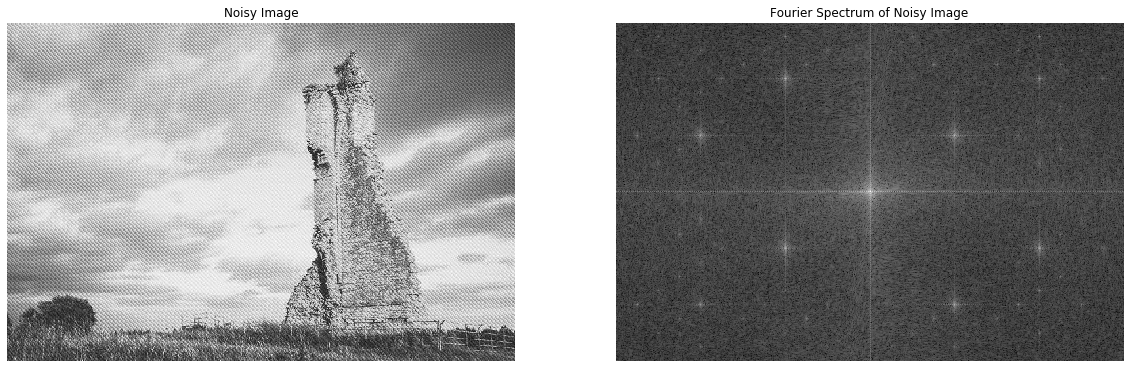

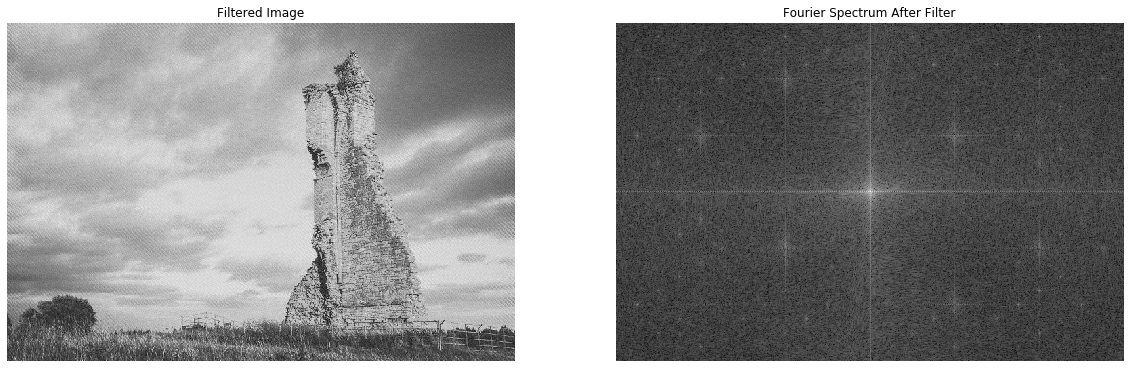

Lossy conversion from float64 to uint8. Range [-0.0020238600596506656, 1.0711057381382838]. Convert image to uint8 prior to saving to suppress this warning.


In [102]:
##### NOMOR 3
ruin = io.imread('ruin.jpg')
w, l = paddedsize(ruin.shape[0],ruin.shape[1])
F = fp.fft2(util.img_as_float(ruin),(w,l))
Fc = fp.fftshift(F)
S1 = np.log(1+abs(Fc))

plt.figure(figsize=(20,8))
plt.subplot(121), plt.imshow(ruin, cmap='gray'),plt.title('Noisy Image'),plt.axis("off")
plt.subplot(122), plt.imshow(S1, cmap='gray'),plt.title('Fourier Spectrum of Noisy Image'),plt.axis("off")
plt.show()

# fungsi notch terdapat pada file helper.py
H1 = notch('btw', w, l, 10, 250, 335)
H2 = notch('btw', w, l, 10, 500, 170)

H3 = notch('btw', w, l, 10, 250, -168)
H4 = notch('btw', w, l, 10, 500, -335)

H5 = notch('btw', w, l, 10, -250, 170)
H6 = notch('btw', w, l, 10, -500, 335)

H7 = notch('btw', w, l, 10, -250, -335)
H8 = notch('btw', w, l, 10, -500, -168)

fs = F*H1*H2*H3*H4*H5*H6*H7*H8
f= fp.ifft2(fs).real
f = F_football[:football.shape[0],:football.shape[1]]
Fcf = fp.fftshift(fs)
S2 = np.log(1+abs(Fcf))

plt.figure(figsize=(20,8))
plt.subplot(121); plt.imshow(f, cmap='gray')
plt.title('Filtered Image'); plt.axis("off")
plt.subplot(122); plt.imshow(S2, cmap='gray')
plt.title('Fourier Spectrum After Filter'); plt.axis("off")
plt.show()

In [ ]:
football = io.imread('ruin.jpg')